Customer Segmentation @Hanan

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
print("Shape:", df.shape)

print(df.head())

Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
print("\nData types:")
print(df.dtypes)


Data types:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [8]:
# 2) we have to Rename columns for easier handling
df = df.rename(columns={
    "CustomerID": "customer_id",
    "Genre": "gender",
    "Age": "age",
    "Annual Income (k$)": "annual_income_k",
    "Spending Score (1-100)": "spending_score"
    })

In [9]:
df.head()

,customer_id,gender,age,annual_income_k,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicates:", df.duplicated().sum())


Missing values:
 customer_id        0
gender             0
age                0
annual_income_k    0
spending_score     0
dtype: int64

Duplicates: 0


In [11]:
print("\nSummary stats:")
print(df.describe())


Summary stats:
       customer_id         age  annual_income_k  spending_score
count   200.000000  200.000000       200.000000      200.000000
mean    100.500000   38.850000        60.560000       50.200000
std      57.879185   13.969007        26.264721       25.823522
min       1.000000   18.000000        15.000000        1.000000
25%      50.750000   28.750000        41.500000       34.750000
50%     100.500000   36.000000        61.500000       50.000000
75%     150.250000   49.000000        78.000000       73.000000
max     200.000000   70.000000       137.000000       99.000000


In [12]:
print("\nGender counts:")
print(df['gender'].value_counts())


Gender counts:
gender
Female    112
Male       88
Name: count, dtype: int64


<Axes: >

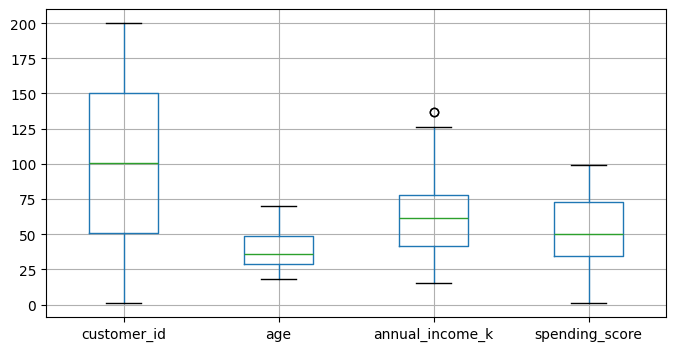

In [14]:
df.boxplot(figsize=(8,4))

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'annual_income_k'}>,
        <Axes: title={'center': 'spending_score'}>]], dtype=object)

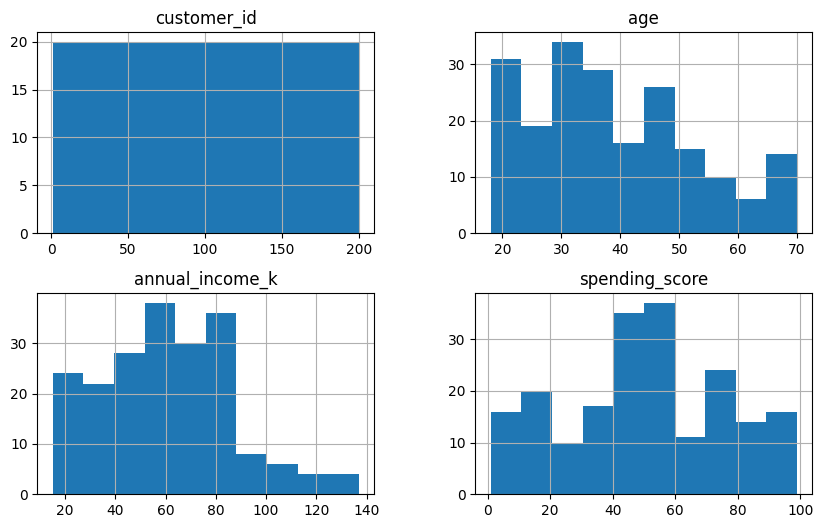

In [15]:
df.hist(figsize=(10,6))

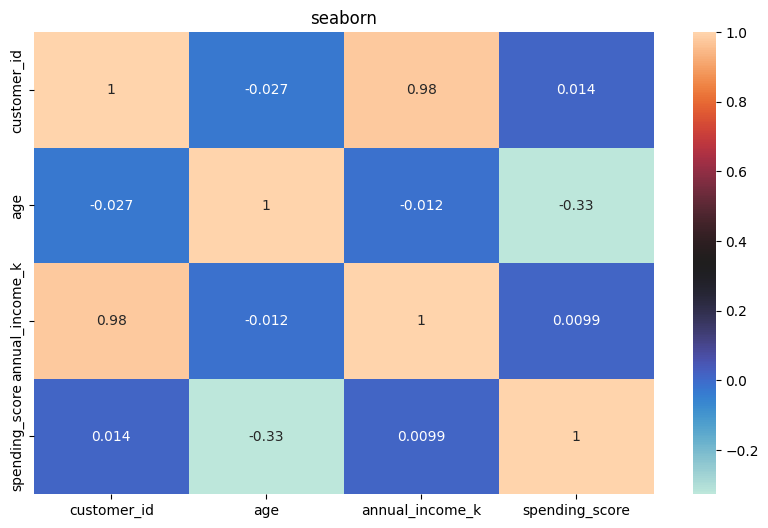

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='icefire').set_title('seaborn')
plt.show()

In [22]:
features = df[['annual_income_k', 'spending_score']]

In [23]:
scaler = StandardScaler()

In [24]:
scaled_features = scaler.fit_transform(features)

In [25]:
scaled_df = pd.DataFrame(scaled_features, columns=['annual_income_k', 'spending_score'])
print("First 5 rows of scaled data:")
print(scaled_df.head())

First 5 rows of scaled data:
   annual_income_k  spending_score
0        -1.738999       -0.434801
1        -1.738999        1.195704
2        -1.700830       -1.715913
3        -1.700830        1.040418
4        -1.662660       -0.395980


In [27]:
inertia_values = []

# Test k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

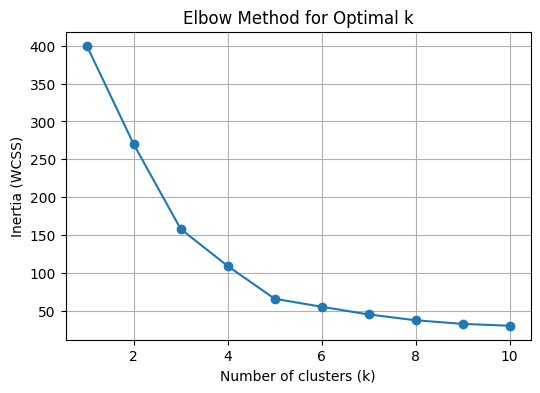

In [28]:
#Plot
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

In [30]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_df)

In [32]:
df.head(10)

,customer_id,gender,age,annual_income_k,spending_score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


In [33]:
print("\nCluster counts:")
print(df['cluster'].value_counts())


Cluster counts:
cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


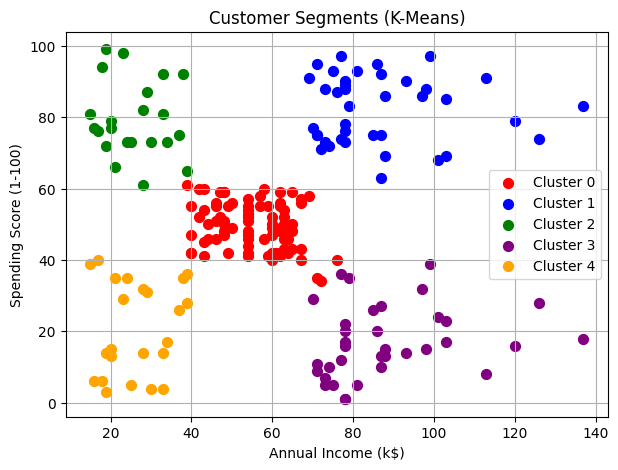

In [37]:
# Color palette for 5 clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(7,5))

for cluster_id in sorted(df['cluster'].unique()):
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['annual_income_k'],
                cluster_points['spending_score'],
                s=50,
                c=colors[cluster_id],
                label=f'Cluster {cluster_id}')
    plt.title('Customer Segments (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
#  showing Group by cluster and calculate the averages
cluster_summary = df.groupby('cluster').agg({
    'age': 'mean',
    'annual_income_k': 'mean',
    'spending_score': 'mean',
    'customer_id': 'count'  # cluster size
}).rename(columns={'customer_id': 'count'})

print("Cluster Summary (averages):")
print(cluster_summary)

Cluster Summary (averages):
               age  annual_income_k  spending_score  count
cluster                                                   
0        42.716049        55.296296       49.518519     81
1        32.692308        86.538462       82.128205     39
2        25.272727        25.727273       79.363636     22
3        41.114286        88.200000       17.114286     35
4        45.217391        26.304348       20.913043     23


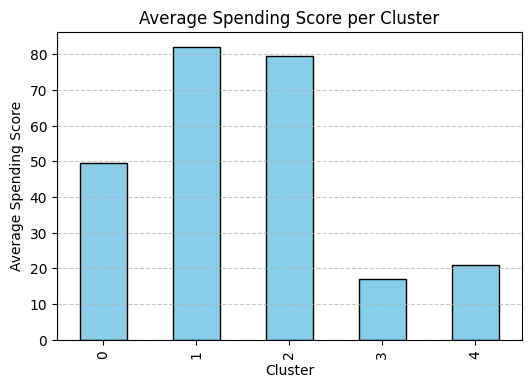

In [39]:
avg_spending = df.groupby('cluster')['spending_score'].mean()

# Plot
plt.figure(figsize=(6,4))
avg_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Spending Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
# Here we are Applying DBSCAN(Density-based clustering)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # you can tweak eps & min_samples
df['dbscan_cluster'] = dbscan.fit_predict(scaled_df)

# Cluster counts (-1 = noise/outliers)
print("DBSCAN Cluster Counts:")
print(df['dbscan_cluster'].value_counts())




DBSCAN Cluster Counts:
dbscan_cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


/tmp/ipython-input-164044479.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


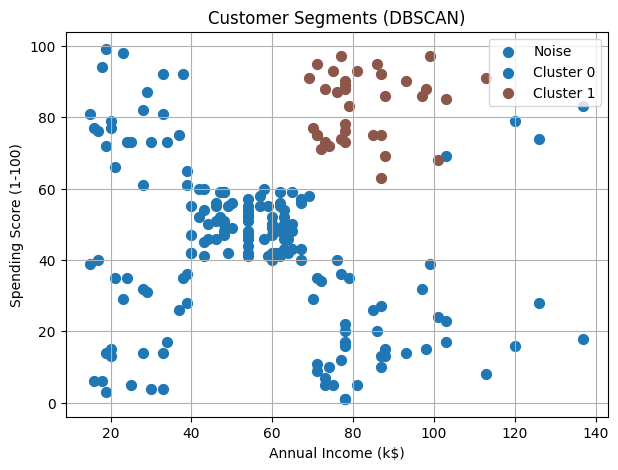

In [42]:
plt.figure(figsize=(7,5))
unique_labels = sorted(df['dbscan_cluster'].unique())
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    cluster_points = df[df['dbscan_cluster'] == label]
    plt.scatter(cluster_points['annual_income_k'],
                cluster_points['spending_score'],
                s=50,
                color=colors(label),
                label=f'Cluster {label}' if label != -1 else 'Noise')

plt.title('Customer Segments (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

Reviewed by @Hanan

This project segmented mall customers using K-Means and DBSCAN based on annual income and spending score.

K-Means (k=5) identified 5 clear customer groups with distinct spending patterns.

DBSCAN found 2 dense clusters and 8 outliers, highlighting noise and irregular patterns.

***Key Takeaways:***

High-income, high-spending customers → prime targets for premium offers.

High-income, low-spending customers → need engagement strategies.

Low-income, high-spending customers → respond well to budget promotions.

Low-income, low-spending customers → require reactivation campaigns.


**Recommendation:**

Combining K-Means for structured segmentation with DBSCAN for noise detection enables targeted marketing, customer retention, and data-driven decision-making.